<a href="https://colab.research.google.com/github/AkashRathod25/Deep-Learning-6-July/blob/main/3_Binary_Classification_(13_7_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.Binary Classification Problem


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# 1.Load Data

In [2]:
import pandas as pd
url1 = ("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv")
df = pd.read_csv(url1)
df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


# 2.Perform basic Data Quality Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [5]:
df.duplicated().sum()

0

# 3.Seperate X (Feature Variable) and Y (Target Variable)
id is stastically insignificant

In [6]:
x = df.drop(columns = ["id" , "booking_status"])
y = df[["booking_status"]]

In [7]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Step 4: Perform preprocessing on X

In [9]:
x.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,int64
required_car_parking_space,int64
room_type_reserved,int64
lead_time,int64
arrival_year,int64
arrival_month,int64


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline (steps=[("impute" , SimpleImputer(strategy="median")) ,
                             ("scaler" , StandardScaler())]).set_output(transform='pandas')

num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [12]:
x_pre = num_pipe.fit_transform(x)

x_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


# 5.Apply Train Test split


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain , xtest , ytrain , ytest = train_test_split (x_pre , y , test_size=0.2 , random_state=35)

In [15]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
33066,0.151040,1.908162,0.130259,0.421768,-0.407020,-0.160945,-0.515173,-1.195140,0.409661,0.850531,-1.001628,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,0.552579
26034,-1.753925,-0.313454,-0.998814,1.823003,1.294624,-0.160945,-0.515173,-1.096457,0.409661,1.203968,-0.101586,0.428551,-0.173408,-0.060506,-0.101479,-1.509647,0.552579
36354,0.151040,1.908162,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,-0.060295,0.409661,-0.209778,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,0.455956,0.552579
3663,-1.753925,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.541370,0.409661,-0.563215,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,0.480189,0.552579
39595,0.151040,-0.313454,-0.998814,-0.278849,-0.407020,-0.160945,0.685890,-0.504365,0.409661,0.497095,0.010919,0.428551,-0.173408,-0.060506,-0.101479,1.207193,0.552579


In [16]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
31981,-1.753925,-0.313454,-0.998814,-0.979466,-0.407020,6.213283,-0.515173,-1.281486,0.409661,1.203968,0.910961,2.007031,5.766758,-0.060506,6.249191,-1.011515,-0.737691
27864,0.151040,1.908162,1.259332,-0.979466,2.996268,6.213283,-0.515173,-0.812746,0.409661,0.143658,0.573445,0.428551,-0.173408,-0.060506,-0.101479,2.448485,1.842849
39016,0.151040,-0.313454,-0.998814,-0.278849,-0.407020,-0.160945,1.886953,-0.701729,-2.441040,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.025139,0.552579
3764,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-0.886758,-2.441040,0.497095,-0.101586,-1.149928,-0.173408,-0.060506,-0.101479,-0.082565,-0.737691
936,0.151040,-0.313454,0.130259,0.421768,-0.407020,-0.160945,-0.515173,0.038387,0.409661,-0.563215,0.573445,0.428551,-0.173408,-0.060506,-0.101479,-0.454953,0.552579


In [17]:
ytrain.head()

,booking_status
33066,0
26034,0
36354,1
3663,0
39595,0


In [18]:
ytest.head()

,booking_status
31981,0
27864,0
39016,0
3764,1
936,0


In [19]:
xtrain.shape

(33680, 17)

In [20]:
xtest.shape

(8420, 17)

# Step 6: Build the neural network

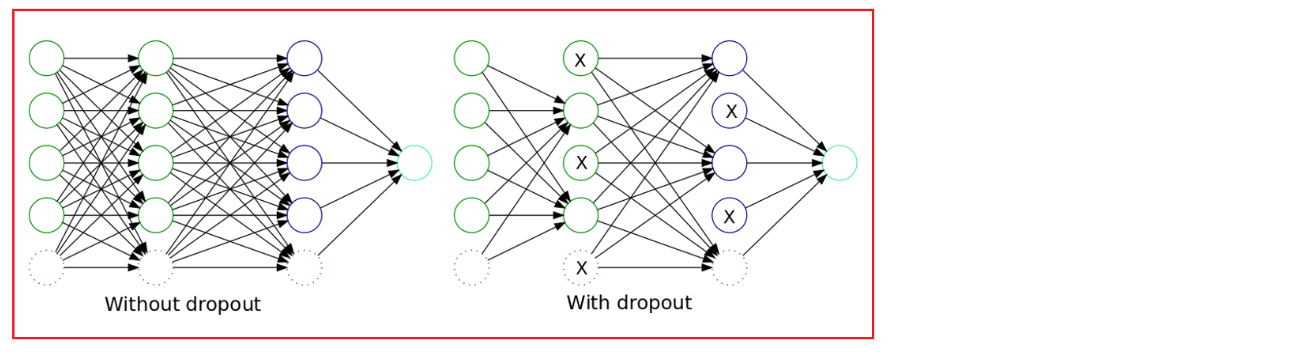

## 6.1.Dropout layer - Randomly drop some % of neuron links


In [21]:
xtrain.shape[0]  # 0 for No of Rows

33680

In [22]:
xtrain.shape[1]  # 1 for No of Columns

17

In [23]:
from keras.models import Sequential
from keras.layers import Input , Dense , Dropout

In [24]:
# Initialize the model
model = Sequential()

# Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Hidden Layer 1
model.add(Dense(64 , activation='relu'))
# Add Dropout Layer 1
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32 , activation = 'relu'))
# Add Dropout Layer 2
model.add(Dropout(0.3))

# Add Output Layer
model.add(Dense(1 , activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Complie the model

model.compile(loss="crossentropy" , metrics=["accuracy"] , optimizer="adam")

In [27]:
hist = model.fit(xtrain , ytrain , validation_split=0.2 , epochs=60)

Epoch 1/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7042 - loss: 0.5646 - val_accuracy: 0.7825 - val_loss: 0.4641
Epoch 2/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7662 - loss: 0.4892 - val_accuracy: 0.7876 - val_loss: 0.4584
Epoch 3/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7672 - loss: 0.4862 - val_accuracy: 0.7852 - val_loss: 0.4577
Epoch 4/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7759 - loss: 0.4783 - val_accuracy: 0.7925 - val_loss: 0.4543
Epoch 5/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7820 - loss: 0.4722 - val_accuracy: 0.7926 - val_loss: 0.4533
Epoch 6/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7852 - loss: 0.4646 - val_accuracy: 0.7926 - val_loss: 0.4520
Epoch 7/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7903 - loss: 0.4643 - val_accuracy: 0.7960 - val_loss: 0.4466
Epoch 8/60
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7886 - loss: 0.4606 - val_accuracy: 0.

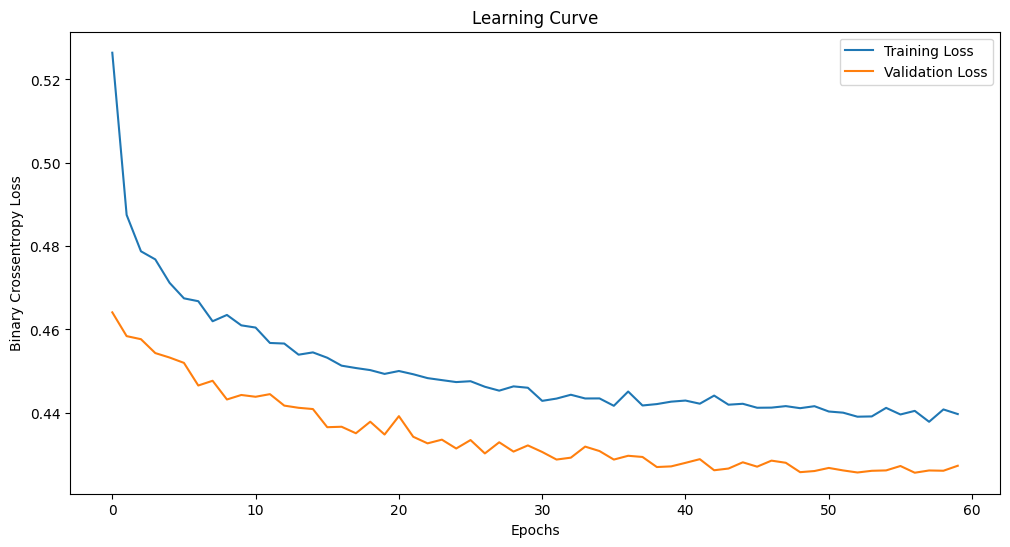

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(hist.history["loss"] , label='Training Loss')
plt.plot(hist.history['val_loss'] , label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [29]:
model.evaluate(xtrain , ytrain)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8099 - loss: 0.4183


[0.42042115330696106, 0.8095902800559998]

In [30]:
model.evaluate(xtest , ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8061 - loss: 0.4441


[0.43961477279663086, 0.8068883419036865]

# 7.Predict the results for train and test

In [31]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
yprob_train[0:5]

array([[0.03349196],
       [0.1440575 ],
       [0.44796485],
       [0.18264794],
       [0.2939317 ]], dtype=float32)

In [33]:
ytrain.head()

,booking_status
33066,0
26034,0
36354,1
3663,0
39595,0


In [34]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [35]:
ypred_train[0:5]

[0, 0, 0, 0, 0]

In [36]:
yprob_test[0:5]

array([[2.2017929e-08],
       [1.5321044e-02],
       [9.5700443e-02],
       [6.4403616e-02],
       [1.5274668e-01]], dtype=float32)

In [37]:
ytest.head()

,booking_status
31981,0
27864,0
39016,0
3764,1
936,0


In [38]:
ypred_test[0:5]

[0, 0, 0, 0, 0]

# 8.Confision Matrix

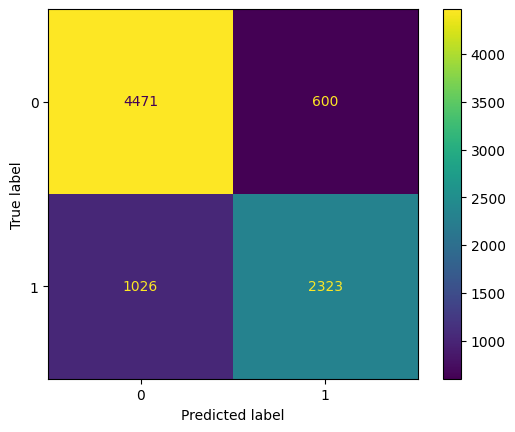

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest , ypred_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5071
           1       0.79      0.69      0.74      3349

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.80      8420



In [41]:
# ROC_AUC score is more than 80% hence model is good

from sklearn.metrics import roc_auc_score
roc_auc_score(ytest , yprob_test)

0.8742406940583752

# 9.Out of sample predictions

In [42]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv"
df2 = pd.read_csv(url2)

df2

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [43]:
x2 = df2.drop(columns=['id'])

x2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [44]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [45]:
x2_pre = num_pipe.fit_transform(x2)

x2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [46]:
probs2 = model.predict(x2_pre)
probs2[0:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.04768609],
       [0.02311886],
       [0.30708182],
       [0.14867729],
       [0.43191203]], dtype=float32)

In [47]:
pred2 = [1 if prob>=0.5 else 0 for prob in probs2]
pred2[0:5]

[0, 0, 0, 0, 0]

In [48]:
df_final = df2[['id']]
df_final['booking_status'] = pred2
df_final['probability'] = probs2

In [49]:
df_final

,id,booking_status,probability
0,42100,0,0.047686
1,42101,0,0.023119
2,42102,0,0.307082
3,42103,0,0.148677
4,42104,0,0.431912
...,...,...,...
28063,70163,1,0.966210
28064,70164,0,0.024325
28065,70165,0,0.148662
28066,70166,0,0.491393


In [52]:
df_final['booking_status'].value_counts()

,count
booking_status,
0,18592
1,9476


<Axes: xlabel='booking_status'>

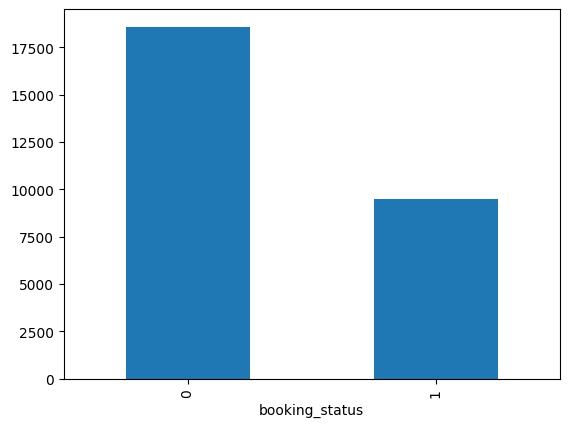

In [54]:
df_final['booking_status'].value_counts().plot(kind='bar')

In [55]:

df_final.to_csv("Results.csv", index=False)